<a href="https://colab.research.google.com/github/remre/TopicModelinLDAreddit/blob/main/redditclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deal with the Text in CoffeeHouse

## Libraries

In [1]:
# !pip install pyLDAvis==3.2.2

In [1]:
# import os 
# # %matplotlib inline

# import time
# import glob

# import tensorflow as tf
# from tensorflow import keras
# import random
# # import stanza

# # from custom_preprocessing import CustomPreProcessing
# # from custom_preprocessing import PreProcessing
# # from class_metric import Metrics

# import sklearn
# from sklearn.utils import class_weight
# from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn import decomposition, ensemble
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score
# from sklearn import tree
# from sklearn import neighbors
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import cohen_kappa_score
# from sklearn.metrics import precision_score
# from sklearn.model_selection import cross_validate
# from sklearn.linear_model import SGDClassifier

# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing import sequence
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation
# from keras.layers import Embedding
# from keras.layers import Conv1D, GlobalMaxPooling1D
# from keras.utils import np_utils


# import itertools
# from textblob import TextBlob 

# import xgboost as xgb
# from xgboost import XGBClassifier


# import string
# # import fasttext
# # import fasttext.util
# from tqdm import tqdm


# import pickle
# from sklearn.feature_extraction.text import CountVectorizer
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from nltk.tokenize import RegexpTokenizer

# # DO = '#7D1B7E'

# # %config InlineBackend.figure_format = 'retina'
# # %matplotlib inline
# # plt.style.use('fivethirtyeight')
from IPython.display import Image
# # ---- Call tqdm to see progress bar with pandas
# # tqdm().pandas()
# import zipfile
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
# import pyLDAvis.gensim_models

import pandas as pd 
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# os.environ["KAGGLE_CONFIG_DIR"] = ("/content")

c:\Users\emreb\Documents\projects\translatortelegram\transtele\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


## Data Loading

We will load and check the data info in this section


In [2]:
!kaggle datasets download -d ehallmar/reddit-comment-score-prediction

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
# with zipfile.ZipFile('/content/reddit-comment-score-prediction.zip', 'r') as zip_ref:#the directory of zipped file
#     zip_ref.extractall('/content/drive/MyDrive/dataAI/redditdata') #directory of unzipped file

In [3]:
# dk = pd.read_csv('C:/Users/emreb/Documents/projects/newonelast/redditdata/comments_negative.csv')
# df2 = pd.read_csv('C:/Users/emreb/Documents/projects/newonelast/redditdata/comments_positive.csv')
# dfr = pd.concat([dk,df2])

In [3]:
dfr = pd.read_csv('C:/Users/emreb/Documents/projects/newonelast/redditdata//abcnews-date-text.csv')

In [4]:
dfr.info()
dfr.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244184 entries, 0 to 1244183
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   publish_date   1244184 non-null  int64 
 1   headline_text  1244184 non-null  object
dtypes: int64(1), object(1)
memory usage: 19.0+ MB


publish_date     0
headline_text    0
dtype: int64

In [14]:
# 3
dfr['subreddit_id'].value_counts()

t5_2qh1i    706816
t5_2qh33    285724
t5_2qh0u    271402
t5_2qh61    169678
t5_2qh03    152591
             ...  
t5_2susi         1
t5_2s7u4         1
t5_2rufc         1
t5_30kkx         1
t5_2y0mz         1
Name: subreddit_id, Length: 5944, dtype: int64

In [5]:
dfr['author'] = dfr['author'].astype(str)

In [ ]:
# # 1
# type(json.loads(dfr['author']))

## Profanity Filter ##

In [ ]:
from profanity_filter import ProfanityFilter
import spacy

pf = ProfanityFilter(languages=['en'])

pf.censor("That's bullshit!")
# "That's ********!"

k =  pf.censor_word('fuck')
# Word(uncensored='fuck', censored='****', original_profane_word='fuck')

In [ ]:
nlp = spacy.load('en')
profanity_filter = ProfanityFilter(nlps={'en': nlp})  # reuse spacy Language (optional)
nlp.add_pipe(profanity_filter.spacy_component, last=True)



for i in range(0,100):
  doc = nlp(str(dfr['text'][i]))

  doc._.is_profane
# True

  doc[:2]._.is_profane
# False

  for token in doc:
    if token._.original_profane_word != None:
        print(f'{token}: '
              f'\ncensored={token._.censored}, '
              f'\nis_profane={token._.is_profane}, '
              f'\noriginal_profane_word={token._.original_profane_word}'
        )

In [ ]:
# dfrr = dfr['text'][:3]
# train_token = ''
# for i in dfr['text']:
#    train_token += str(i)

In [ ]:
# this is how to add desired words by hard
# pf.extra_profane_word_dictionaries = {'en': {'chocolate', 'orange'}}

In [ ]:
from better_profanity import profanity


for i in range(0,100):
  doc = nlp(str(dfr['text'][i]))

  
  if __name__ == "__main__":
      # custom_badwords = ['happy', 'jolly', 'merry']
      # profanity.load_censor_words(custom_badwords)
      profanity.load_censor_words()

      for text in doc:
        censored_text = profanity.censor(text)# profanity.contains_profanity(str(text))
        print(censored_text)
        # You **** of ****.

In [ ]:
from profanity_filter import ProfanityFilter
# from rsrsrs.warmup.oopcorey import Employee
import spacy


class ProfanityChecker:

    def __init__(self, text):
        self.text = text 

    def proff(self):
        nlp = spacy.load('en')
        pf = ProfanityFilter(nlps={'en': nlp})  # reuse spacy Language (optional)
        nlp.add_pipe(pf.spacy_component, last=True)
        print(pf.spacy_component)
        # pf.set_censor_char('*')
        return pf.censor(self.text)



text1 = ProfanityChecker('what the fuck is this!!')
print(text1.proff())

## Data Processing ##

### Text Classification and  Topic modeling

In [6]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# # Plotting tools
# import pyLDAvis
# import pyLDAvis.gensim  # don't skip this
# import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

c:\Users\emreb\Documents\projects\translatortelegram\transtele\lib\site-packages\gensim\matutils.py:22: DeprecationWarning: Please use `triu` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.
  from scipy.linalg.special_matrices import triu


In [7]:
# import bertopic
# from bertopic import BERTopic
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
nltk.download('wordnet')
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emreb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\emreb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
dfr.head()

,id,parent_id,subreddit_id,link_id,text,score,ups,author,controversiality,parent_link_id,parent_text,parent_score,parent_ups,parent_author,parent_controversiality
0,c0a2d2p,t1_c0a2cn1,t5_1a8ah,t3_8pr4w,"Na, not really. \n\nI just hate islam and ever...",-2946,-2946,b34nz,0,t3_8pr4w,What goes through the heads of you people? Is...,459,459,[deleted],0
1,c6okok8,t1_c6oaywb,t5_2s8e9,t3_11otij,lol you're some ugly ass white dude,-2724,-2724,letmetellyouhowitis,0,t3_11otij,This is worth noting.\n\nThankfully I don't.,72,72,flowen65,0
2,c3nlalf,t1_c3nijr7,t5_2qzb6,t3_p9a1v,"First of off, its not true, and second off, I ...",-2132,-2132,iamwoodyharrelson,0,t3_p9a1v,I swear this is *(allegedly)* a true story. I...,4028,4028,AndyRooney,0
3,c10nh8q,t1_c10nc34,t5_6,t3_djasj,Who made you reddit police? I will submit what...,-2117,-2117,JimmyJamesincorp,0,t3_djasj,I was on my way over here to bitch and moan ab...,1214,1214,SloaneRanger,0
4,c3nlufk,t1_c3nlcob,t5_2qzb6,t3_p9a1v,We gotta be...i consider my time valuable.,-1962,-1962,iamwoodyharrelson,0,t3_p9a1v,Should change this AMA to AMAAR (Ask Me Anythi...,1405,1405,bersh,0


In [8]:
dfr['n_characters'] = dfr['text'].str.len()

In [9]:
dfr.query("n_characters>20").sort_values('n_characters', ascending=False)['text'][1]

1    Well, it is exactly what it sounds like. It's ...
1                  lol you're some ugly ass white dude
Name: text, dtype: object

In [23]:
dfr.loc[1]

,id,parent_id,subreddit_id,link_id,text,score,ups,author,controversiality,parent_link_id,parent_text,parent_score,parent_ups,parent_author,parent_controversiality,n_characters
1,c6okok8,t1_c6oaywb,t5_2s8e9,t3_11otij,lol you're some ugly ass white dude,-2724,-2724,letmetellyouhowitis,0,t3_11otij,This is worth noting.\n\nThankfully I don't.,72,72,flowen65,0,35.0
1,c4imcva,t1_c4im948,t5_2qh1i,t3_t0ynr,"Well, it is exactly what it sounds like. It's ...",9531,9531,Lynfect,0,t3_t0ynr,"Elaborate on this cum box, please.",3841,3841,eeeeevil,0,1746.0


In [ ]:
# df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')
# df.head()

### Extract the text part from data set and process it
The processes include some of aplied text mining methods like lemmatzing, stemming, removing stopwords, n-grams etc

In [ ]:
# datam = df.content.values.tolist()

# # Remove Emails
# datam = [re.sub('\S*@\S*\s?', '', sent) for sent in datam]

# # Remove new line characters
# datam = [re.sub('\s+', ' ', sent) for sent in datam]

# # Remove distracting single quotes
# data_lemmatized = [re.sub("\'", "", sent) for sent in datam]

# print(datam[:1])

['From: (wheres my thing) Subject: WHAT car is this!? Nntp-Posting-Host: rac3.wam.umd.edu Organization: University of Maryland, College Park Lines: 15 I was wondering if anyone out there could enlighten me on this car I saw the other day. It was a 2-door sports car, looked to be from the late 60s/ early 70s. It was called a Bricklin. The doors were really small. In addition, the front bumper was separate from the rest of the body. This is all I know. If anyone can tellme a model name, engine specs, years of production, where this car is made, history, or whatever info you have on this funky looking car, please e-mail. Thanks, - IL ---- brought to you by your neighborhood Lerxst ---- ']


In [13]:
data = dfr.text.sample(n = 50000).values.tolist()

In [14]:
len(data)

50000

In [ ]:
for i in range(len(data)-5):
  if type(data[i]) != str:
    data.pop(i)

In [16]:
def remove_punctuation(text):
    return [tex.replace('[^\w\s]','') for tex in text]

nop = remove_punctuation(data)


In [17]:
def removesigns(text):
    for i in range(len(text)):
        text[i] = text[i].replace('.','').replace('/','').replace("'",'').replace('"','').replace(';','').replace(':','').replace('!','').replace(':','').replace('?','').replace('-','').replace('[','')

In [18]:
data = nop

In [30]:
print(nop[:25])

["Dude, i'm 25 and feeling it! Head up! Retirement soon (ish) and you can hopefully start doing more of what you love!", "Al-Qaeda doesn't exist. Show me what an Al-Qaeda guy looks like. Go on.. oh wait, I forgot, it's a made up enemy created by the west to fight forever. ", 'Uh huh. Uh huh. Uh huh. Uh huh.', "I think it was in the series decline when it was referencing itself all the time wasn't it? 'Spect I will watch it one day on a flight or something.", "I'm not knocking it.  I don't know why I have -16 on this comment.  Fucking reddit idiots.  I'm asking a fucking question.  I'm seriously curious about this.  Why are you fucking idiots downvoting?  I should at the very least have 16 reasons why I have written something worth downvoting.", 'As far as I know nothing except for torch cutters and other intense flame based tools can cut through steel. So this is probably fake. Still a good animation though. ', 'Ladies and gentlemen, the man who had a poop that changed his life, erikpd

### Tokenizer 
it will seperate the text by tokens

In [19]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['looked', 'at', 'my', 'kingdom', 'was', 'fin']]


### N-grams and Lemmatizing

In [20]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['looked', 'at', 'my', 'kingdom', 'was', 'fin']


In [21]:
print(trigram_mod[bigram_mod[data_words[0]]])

['looked', 'at', 'my', 'kingdom', 'was', 'fin']


In [22]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    # """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result


In [23]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
# nlp = spacy.blank("en")
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['look', 'kingdom', 'fin']]


### Corpus and Dictionary

In [24]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)


### Remove very rare and very common words:

In [ ]:

# - words appearing less than 15 times
# - words appearing in more than 10% of all documents

# id2word.filter_extremes(no_below=5, no_above=0.1, keep_n= 100000)

In [25]:

# Create Corpus

texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])
print(id2word[0])

[[(0, 1), (1, 1), (2, 1)]]
fin


In [26]:
document_num = 2
bow_doc_x = corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     id2word[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 6 ("allow") appears 1 time.
Word 7 ("mean") appears 1 time.


In [ ]:
# [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

In [27]:
# LDA multicore 
'''
Train your lda model using gensim.models.LdaMulticore and save it to 'lda_model'
'''
# TODO
al_lda_model =  gensim.models.LdaMulticore(corpus, 
                                   num_topics = 8, 
                                   id2word = id2word,                                    
                                   passes = 10,
                                   workers = 2)

In [43]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in al_lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.022*"say" + 0.022*"go" + 0.019*"people" + 0.015*"get" + 0.014*"know" + 0.013*"man" + 0.013*"woman" + 0.012*"guy" + 0.010*"think" + 0.010*"thing"


Topic: 1 
Words: 0.027*"reddit" + 0.025*"comment" + 0.024*"post" + 0.018*"downvote" + 0.016*"com" + 0.016*"edit" + 0.016*"get" + 0.016*"read" + 0.012*"make" + 0.011*"people"


Topic: 2 
Words: 0.031*"get" + 0.012*"go" + 0.011*"make" + 0.009*"look" + 0.009*"want" + 0.009*"think" + 0.008*"take" + 0.008*"day" + 0.007*"really" + 0.007*"love"


Topic: 3 
Words: 0.019*"need" + 0.013*"dog" + 0.013*"well" + 0.009*"kill" + 0.008*"win" + 0.008*"real" + 0.007*"die" + 0.007*"show" + 0.005*"use" + 0.005*"care"


Topic: 4 
Words: 0.015*"people" + 0.014*"think" + 0.013*"make" + 0.013*"say" + 0.009*"point" + 0.007*"believe" + 0.006*"use" + 0.006*"thing" + 0.006*"way" + 0.006*"fact"


Topic: 5 
Words: 0.015*"people" + 0.012*"get" + 0.010*"work" + 0.009*"make" + 0.007*"money" + 0.007*"pay" + 0.007*"want" + 0.006*"go" + 0.006*"time" + 0.006*

In [28]:
num = 55
unseen_document = data[num]
print(unseen_document)

That sounds like a dare. 


In [29]:
bow_vector = id2word.doc2bow(preprocess(unseen_document))

for index, score in sorted(al_lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, al_lda_model.print_topic(index, 5)))

Score: 0.7810991406440735	 Topic: 0.049*"fuck" + 0.026*"get" + 0.019*"know" + 0.017*"shit" + 0.015*"guy"
Score: 0.03129339590668678	 Topic: 0.040*"people" + 0.034*"say" + 0.017*"think" + 0.011*"word" + 0.010*"mean"
Score: 0.031290095299482346	 Topic: 0.027*"reddit" + 0.024*"post" + 0.024*"comment" + 0.021*"com" + 0.016*"read"
Score: 0.03127753362059593	 Topic: 0.018*"go" + 0.017*"get" + 0.014*"time" + 0.011*"say" + 0.010*"see"
Score: 0.031267739832401276	 Topic: 0.018*"get" + 0.014*"people" + 0.014*"make" + 0.013*"work" + 0.012*"go"
Score: 0.031261079013347626	 Topic: 0.013*"people" + 0.012*"get" + 0.010*"call" + 0.008*"go" + 0.008*"say"
Score: 0.0312570258975029	 Topic: 0.019*"man" + 0.018*"woman" + 0.010*"child" + 0.007*"know" + 0.006*"get"
Score: 0.03125399351119995	 Topic: 0.064*"well" + 0.010*"use" + 0.009*"much" + 0.008*"good" + 0.006*"make"


In [48]:
# Compute Perplexity
print('\nPerplexity: ', al_lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_allda = CoherenceModel(model=al_lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_allda = coherence_model_allda.get_coherence()
print('\nCoherence Score: ', coherence_allda)


Perplexity:  -8.333728752877317


In [36]:
pyLDAvis.enable_notebook()
visal = pyLDAvis.gensim.prepare(al_lda_model, corpus, id2word)
visal

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.117893 -0.011672       1        1  25.560716
7      0.105572  0.032451       2        1  16.042548
4      0.119872 -0.004051       3        1  14.358218
6      0.078375  0.051245       4        1  14.256761
0      0.063360  0.045454       5        1  11.871184
5      0.040255 -0.007585       6        1   8.967464
1     -0.186782 -0.289842       7        1   4.571831
2     -0.338546  0.184000       8        1   4.371279, topic_info=        Term         Freq        Total Category  logprob  loglift
217      com  1530.000000  1530.000000  Default  30.0000  30.0000
202     fuck  3077.000000  3077.000000  Default  29.0000  29.0000
463     game  1919.000000  1919.000000  Default  28.0000  28.0000
833   reddit  1792.000000  1792.000000  Default  27.0000  27.0000
184     play  1356.000000  1356.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
788   source    78.868570   278.000281   Topic8  -5.8462   1.8703
282     call    96.187448  1540.625334   Topic8  -5.6477   0.3565
656    video    86.587194   608.854252   Topic8  -5.7528   1.1797
507     edit    86.796139  1549.682929   Topic8  -5.7504   0.2479
1305    kill    82.604827   977.423211   Topic8  -5.7999   0.6593

[627 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1415      2  0.990615  abortion
506       1  0.278448   account
506       4  0.314483   account
506       5  0.032759   account
506       6  0.039310   account
...     ...       ...       ...
342       3  0.036592      year
342       5  0.261283      year
4038      6  0.281575   youtube
4038      8  0.708480   youtube
8041      3  0.977167    zombie

[1485 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 8, 5, 7, 1, 6, 2, 3])

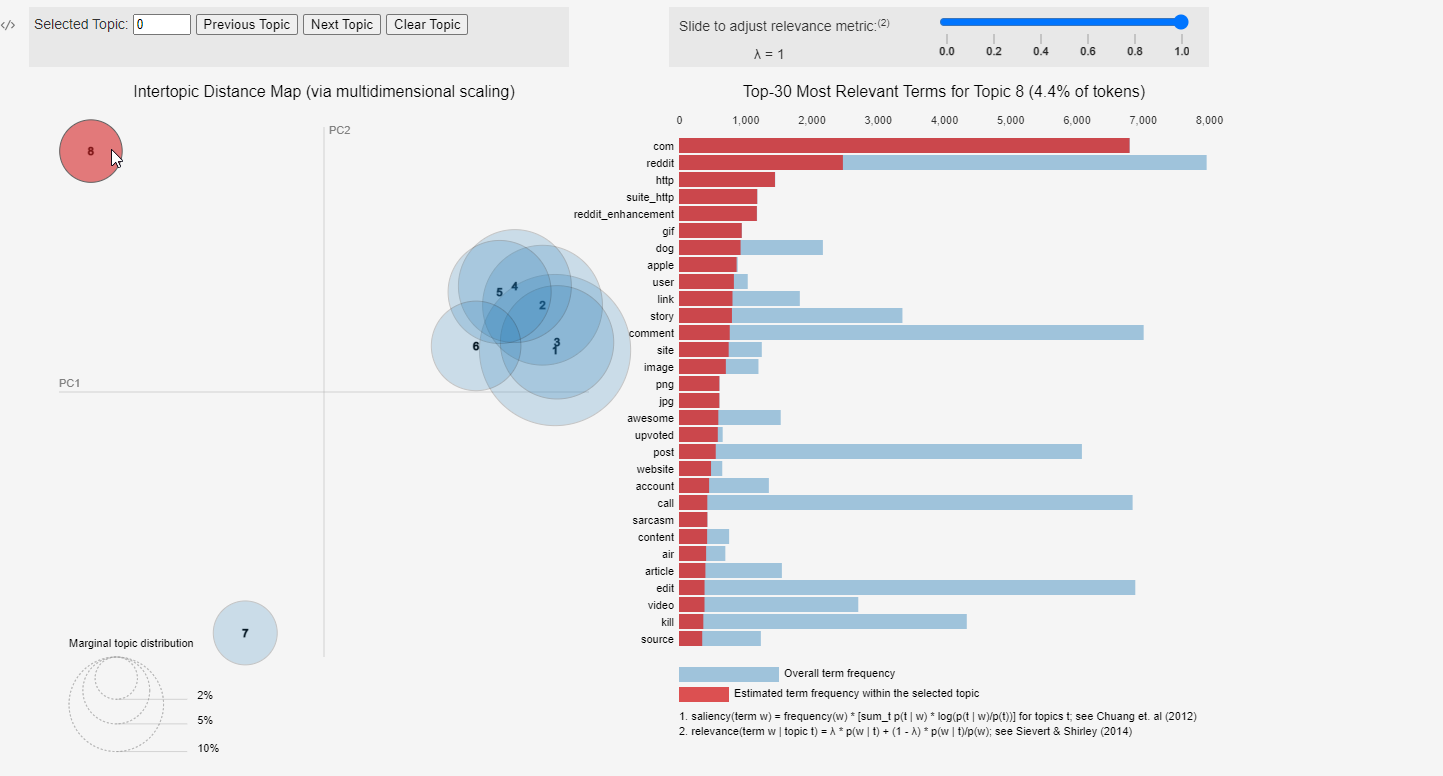

In [2]:
Image(filename='reddittopic1.png')

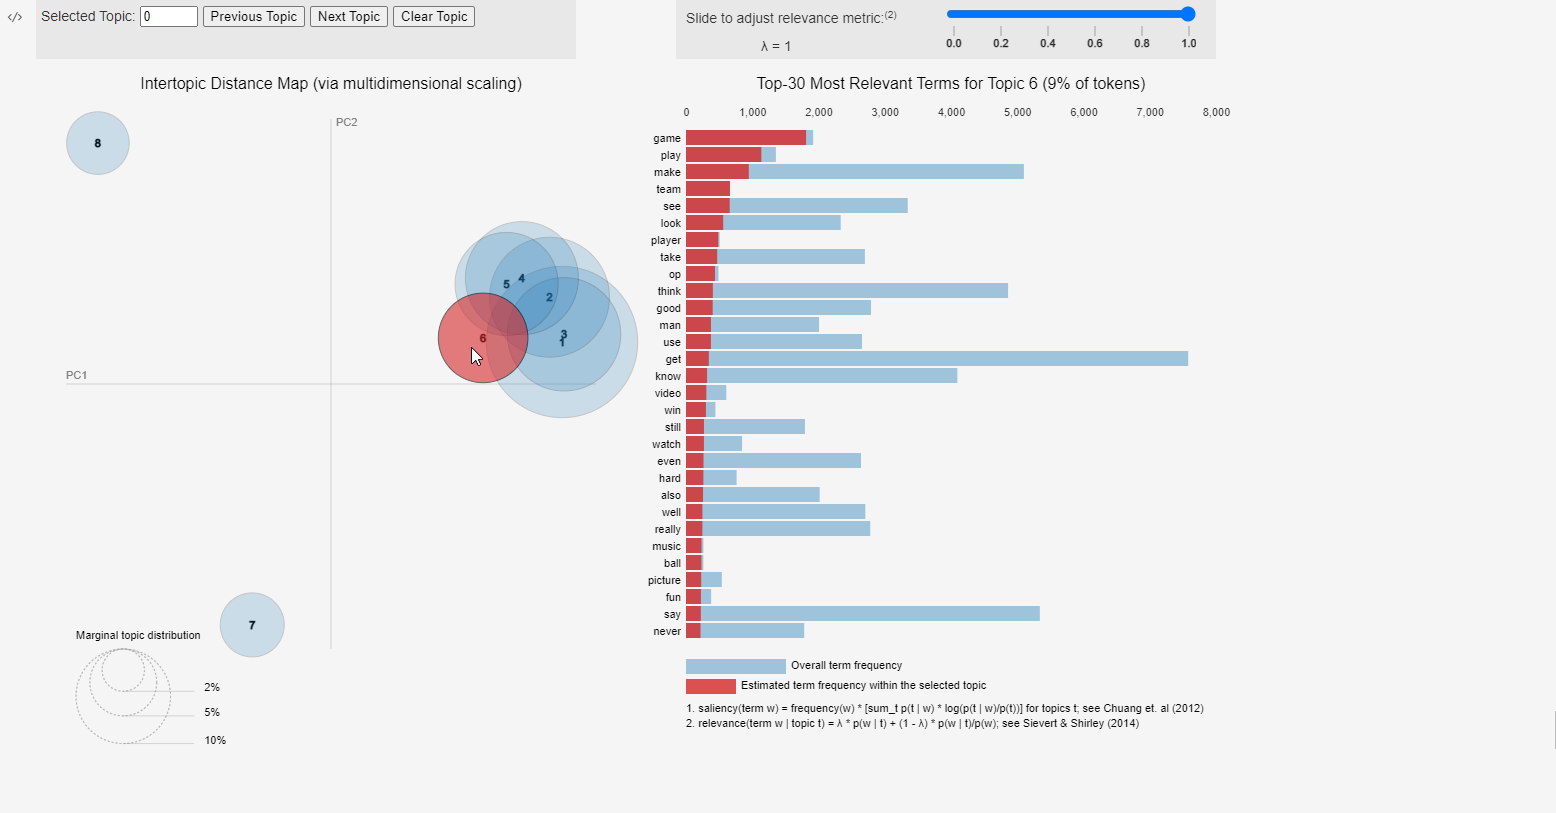

In [3]:
Image(filename='reddittopic2.png')

In [ ]:
# Let's Extend the number of topics and get more Remarkable ones now!

In [37]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [38]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.095*"need" + 0.036*"stupid" + 0.034*"thank" + 0.032*"support" + '
  '0.027*"free" + 0.023*"gun" + 0.021*"spend" + 0.019*"poor" + 0.019*"realize" '
  '+ 0.018*"other"'),
 (1,
  '0.083*"work" + 0.051*"life" + 0.038*"job" + 0.037*"pay" + 0.030*"end" + '
  '0.026*"already" + 0.019*"hour" + 0.018*"player" + 0.017*"business" + '
  '0.017*"walk"'),
 (2,
  '0.053*"play" + 0.042*"believe" + 0.032*"story" + 0.031*"state" + '
  '0.028*"die" + 0.021*"week" + 0.020*"far" + 0.018*"learn" + 0.017*"break" + '
  '0.016*"full"'),
 (3,
  '0.066*"well" + 0.063*"really" + 0.045*"give" + 0.044*"actually" + '
  '0.030*"downvote" + 0.021*"fact" + 0.021*"girl" + 0.020*"enough" + '
  '0.019*"less" + 0.018*"change"'),
 (4,
  '0.213*"say" + 0.086*"man" + 0.032*"real" + 0.027*"true" + 0.021*"answer" + '
  '0.014*"fun" + 0.013*"totally" + 0.013*"mom" + 0.010*"science" + '
  '0.010*"correct"'),
 (5,
  '0.044*"live" + 0.043*"read" + 0.024*"fucking" + 0.022*"human" + 0.021*"sex" '
  '+ 0.021*"animal" + 0.019

In [39]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.231317829827814

Coherence Score:  0.4022807987143701


In [40]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
18    -0.351719 -0.262217       1        1  10.752091
11    -0.203242  0.369651       2        1   9.364605
8     -0.115340  0.047754       3        1   7.857336
3     -0.041574  0.015256       4        1   6.532763
17    -0.024243  0.016747       5        1   5.881435
15    -0.007529  0.001352       6        1   5.749781
14     0.023937 -0.010685       7        1   4.826078
6      0.033428 -0.010521       8        1   4.698258
12     0.037061 -0.009737       9        1   4.490411
16     0.033811 -0.011873      10        1   4.490027
1      0.039101 -0.012126      11        1   4.157075
2      0.048509 -0.012635      12        1   3.992348
13     0.057543 -0.013368      13        1   3.951345
4      0.052205 -0.011710      14        1   3.932619
9      0.060519 -0.016333      15        1   3.611447
5      0.066009 -0.017669      16        1   3.570209
0      0.064021 -0.013278      17        1   3.444839
10     0.070930 -0.014983      18        1   3.337436
7      0.075929 -0.016311      19        1   3.132764
19     0.080644 -0.017314      20        1   2.227132, topic_info=          Term         Freq        Total Category  logprob  loglift
130     people  6390.000000  6390.000000  Default  30.0000  30.0000
122        get  7854.000000  7854.000000  Default  29.0000  29.0000
25         say  5228.000000  5228.000000  Default  28.0000  28.0000
17        make  5302.000000  5302.000000  Default  27.0000  27.0000
303         go  5706.000000  5706.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
2680     reach    94.071668    94.975849  Topic20  -4.9956   3.7949
747   property    93.295911    94.200092  Topic20  -5.0038   3.7948
4189      dota    89.629436    90.533616  Topic20  -5.0439   3.7944
2317  friendly    84.456521    85.360701  Topic20  -5.1034   3.7938
4190    esport    81.768021    82.672253  Topic20  -5.1357   3.7935

[630 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2821      1  0.997599     able
506      15  0.997668  account
671       9  0.997958      act
929       6  0.994645   action
252      12  0.996189   actual
...     ...       ...      ...
2170     13  0.996327    worry
862       2  0.996775    write
734       3  0.999550    wrong
342      10  0.999447     year
2601     11  0.996362    young

[600 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 12, 9, 4, 18, 16, 15, 7, 13, 17, 2, 3, 14, 5, 10, 6, 1, 11, 8, 20])

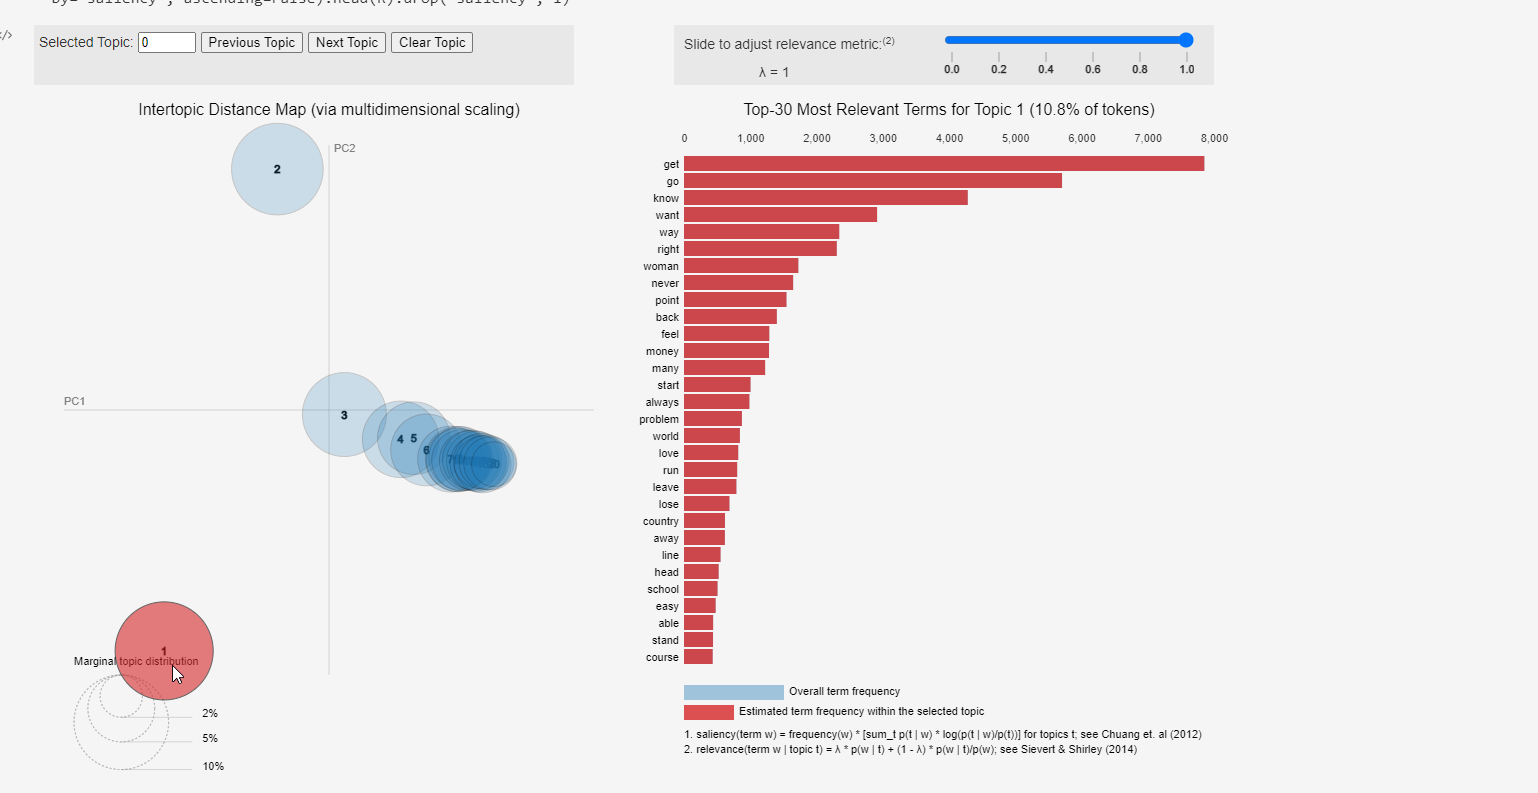

In [4]:
Image(filename='reddittopic3.png')

## mAllet

In [1]:
import zipfile
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

--2022-08-17 19:47:15--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2022-08-17 19:47:16--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip.1’

mallet-2.0.8.zip.1  100%[===================>]  15.43M  16.1MB/s    in 1.0s    

2022-08-17 19:47:17 (16.1 MB/s) - ‘mallet-2.0.8.zip.1’ saved [16184794/16184794]



Mallet provide optimized and enhanced results 

In [ ]:
with zipfile.ZipFile('/content/mallet-2.0.8.zip', 'r') as zip_ref:#the directory of zipped file
    zip_ref.extractall('/content/drive/MyDrive/dataAI/mallet') #directory of unzipped file


In [ ]:
mallet_path = '/content/drive/MyDrive/dataAI/mallet/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [ ]:
import os

os.environ.update({
        'MALLET_HOME':
        r"/content/drive/MyDrive/dataAI/mallet/mallet-2.0.8/bin/mallet",
    })

In [ ]:
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)